<a href="https://colab.research.google.com/github/fahmi143/Karst-2.0/blob/main/Karst2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
import imageio as iio
from PIL import Image
import os
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from keras.models import Sequential, Model
from keras.optimizers import RMSprop
from keras.layers import Activation, Dropout, Flatten, Dense, GlobalMaxPooling2D, Conv2D, MaxPooling2D

In [30]:
class_names= ['Dendritic','Sinkhole']
image_size=(150,150)
batch_size=35



In [31]:
#Data Augmentation
training_data_generator = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True)
validation_data_generator = ImageDataGenerator(rescale=1./255)
test_data_generator = ImageDataGenerator(rescale=1./255)

In [32]:
train_ds = image_dataset_from_directory(
    "/content/drive/MyDrive/KarstImages/TRAIN",
    labels = "inferred",
    label_mode = 'int',
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)
val_ds =image_dataset_from_directory(
    "/content/drive/MyDrive/KarstImages/VALIDATION",
    labels = "inferred",
    label_mode = 'int',
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 16 files belonging to 2 classes.
Found 6 files belonging to 2 classes.


In [33]:
test_ds = test_data_generator.flow_from_directory("/content/drive/MyDrive/KarstImages/TEST/",
                                                    batch_size = 35,
                                                    class_mode = 'binary',
                                                    target_size = (150, 150))

Found 0 images belonging to 0 classes.


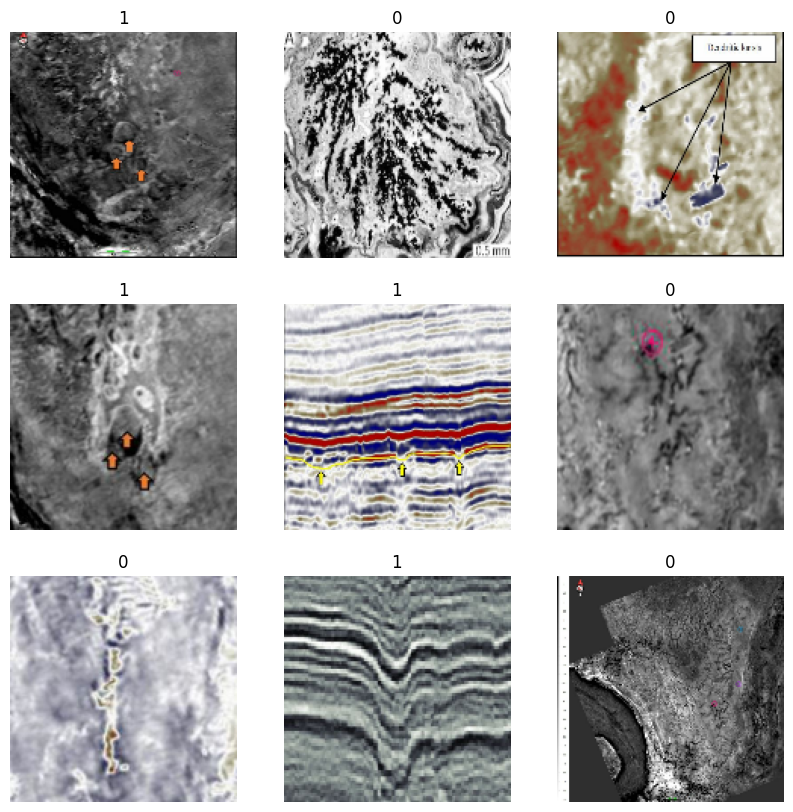

In [34]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

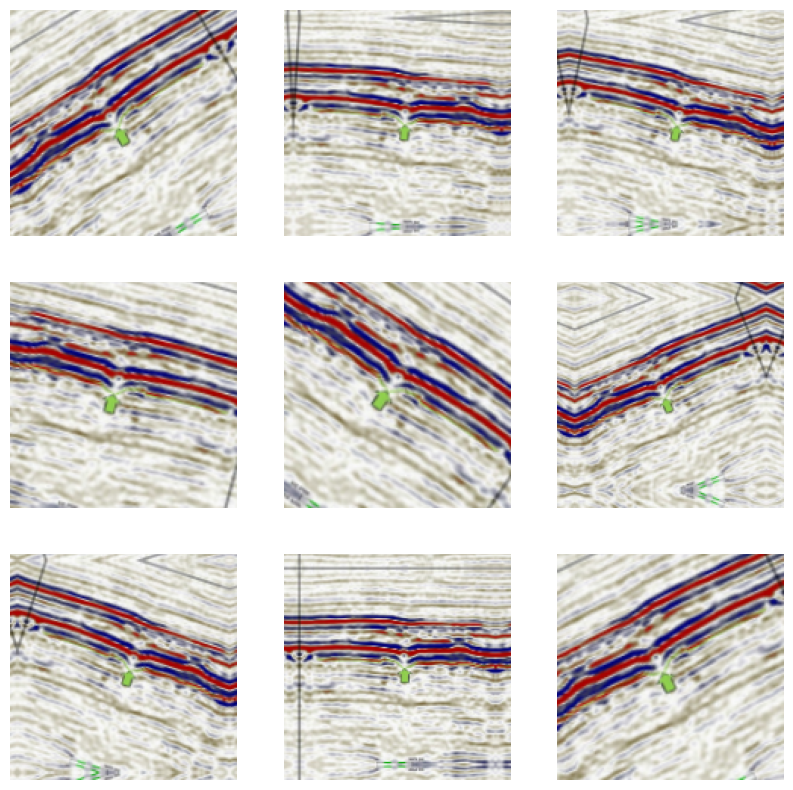

In [35]:
#Augmenting the images
data_augmentation = tf.keras.Sequential(
    [
        tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
        tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
        tf.keras.layers.experimental.preprocessing.RandomZoom(0.2)
    ]
)

plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(2):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [20]:
#Model

model=tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(150,150,3)),
                                  tf.keras.layers.MaxPool2D(2,2),
                                 #
                                tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  #
                            tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPool2D(2,2),
                                #
                            tf.keras.layers.Flatten(),
                                  ##
                            tf.keras.layers.Dense(512,activation='relu'),
                                  ##
                            tf.keras.layers.Dense(1,activation='sigmoid')
                                 ])

In [22]:
model.compile(loss='binary_crossentropy',
    optimizer=RMSprop(learning_rate=0.001),
    metrics=['accuracy'])

In [11]:
train=ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255)

In [37]:
model_fit= model.fit(train_ds,
                     steps_per_epoch=3,
                    epochs=25,
                    validation_data=val_ds)

Epoch 1/25
1/3 [=========>....................] - ETA: 0s - loss: 105.5320 - accuracy: 0.5625

3/3 [==============================] - 0s 38ms/step - loss: 105.5320 - accuracy: 0.5625 - val_loss: 7.1323 - val_accuracy: 0.6667
